In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory_in_str = "./dataset"

In [3]:
file_names = []

directory = os.fsencode(directory_in_str)

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".jpg"): 
         file_names.append(directory_in_str+"/"+filename)
         continue
     else:
         continue
            
file_names.sort()

In [29]:
histograms = []
for filename in file_names:
    img = cv2.imread(filename, cv2.IMREAD_COLOR)
    height, width, channels = img.shape
    hist = np.zeros((64,3))
    for c in range(3):
        bins = np.linspace(0, 255, 63)
        inds = np.digitize(img[:,:,c].flatten(), bins)
        hist[:,c] = np.bincount(inds, minlength=64)   
    histograms.append(hist)

In [43]:
def plot(index):
    plt.subplot(221)
    plt.imshow(cv2.imread(file_names[index], cv2.IMREAD_COLOR), 'gray')
    plt.subplot(222)
    plt.plot(histograms[index][:,0], color="blue")
    plt.plot(histograms[index][:,1], color="green")
    plt.plot(histograms[index][:,2], color="red")
    plt.show()

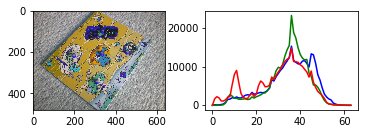

In [44]:
plot(3)

In [81]:
def search(index, top=10):
    hist_query = histograms[index]
    results = []
    for i in range(len(file_names)):
        hist = histograms[i]
        res = np.sum(np.sqrt(np.sum((hist-hist_query)**2, axis=1)))
        results.append(res)
    results_indexes = np.argsort(results)
    itself = results_indexes == index
    results_indexes = results_indexes[~itself]
    return results_indexes[0:top]

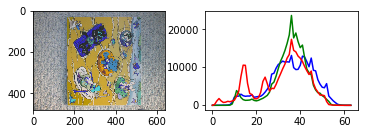

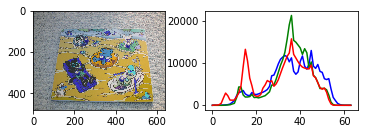

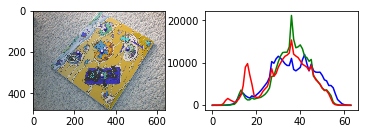

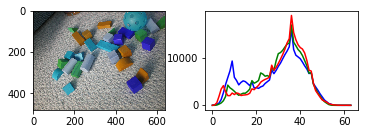

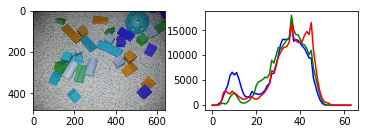

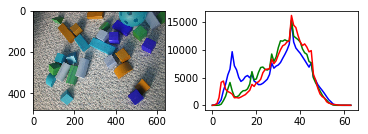

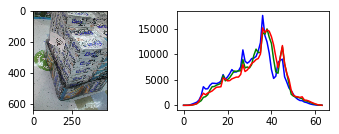

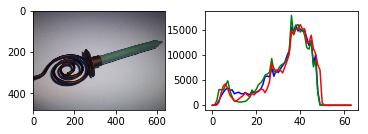

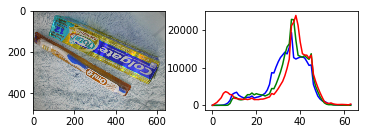

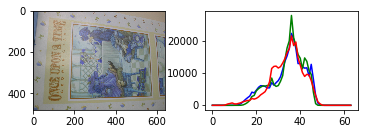

In [82]:
results = search(3)
for res in results: 
    plot(res)

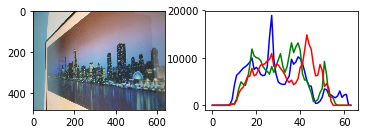

In [83]:
plot(39)

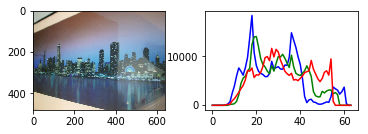

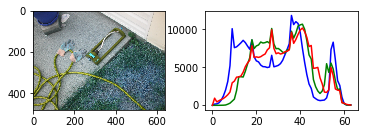

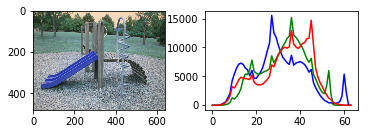

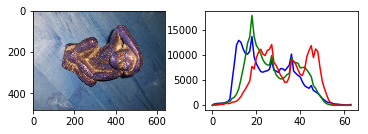

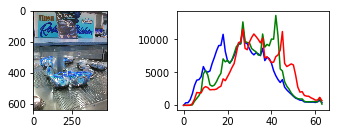

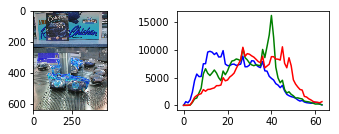

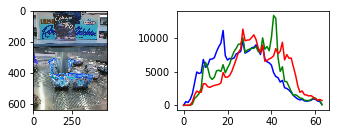

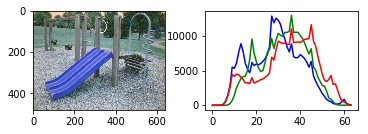

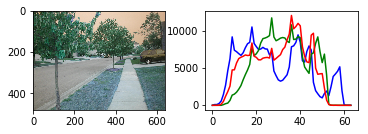

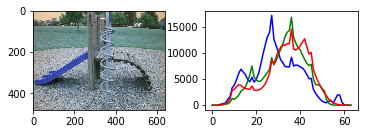

In [84]:
results = search(39)
for res in results: 
    plot(res)

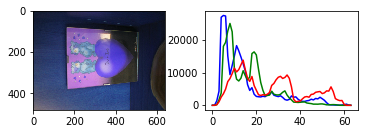

In [85]:
plot(59)

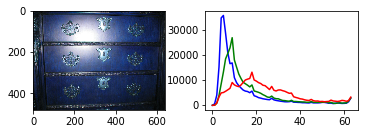

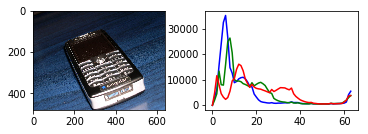

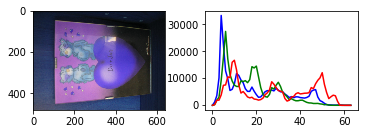

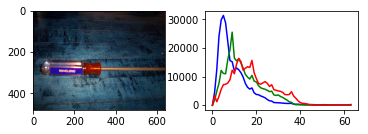

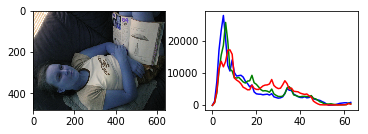

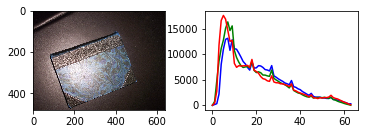

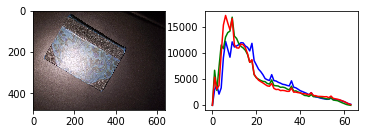

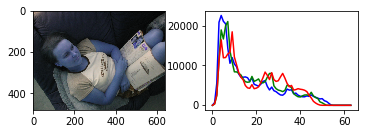

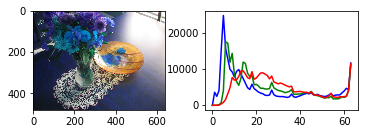

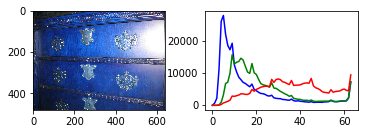

In [86]:
results = search(59)
for res in results: 
    plot(res)

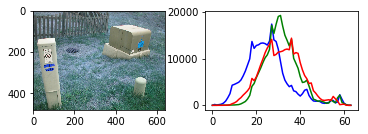

In [87]:
plot(587)

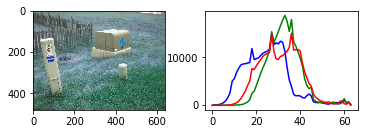

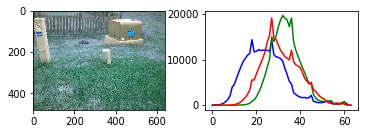

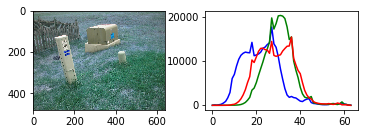

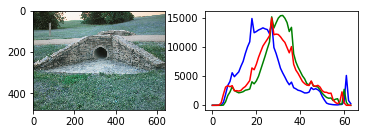

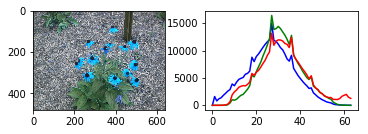

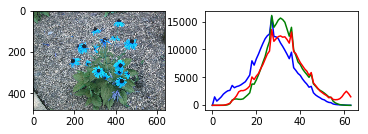

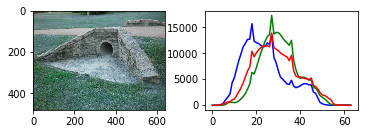

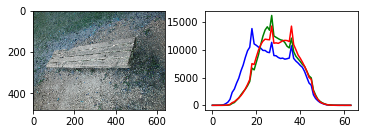

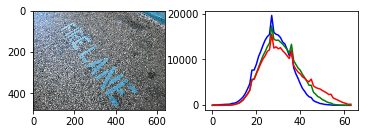

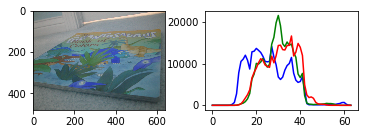

In [88]:
results = search(587)
for res in results: 
    plot(res)

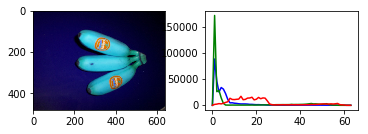

In [89]:
plot(1561)

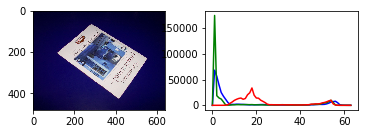

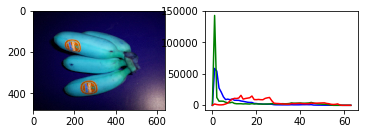

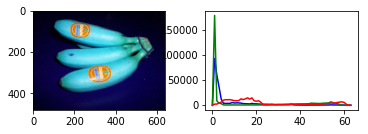

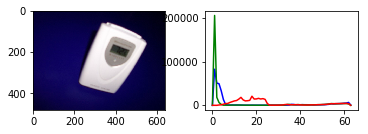

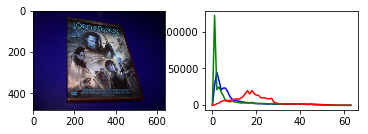

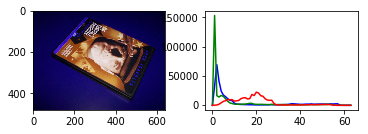

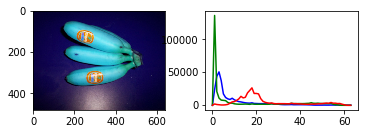

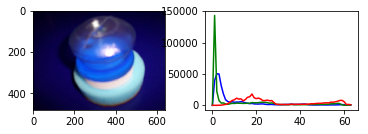

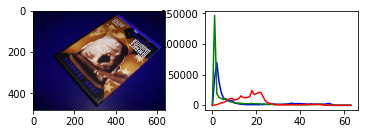

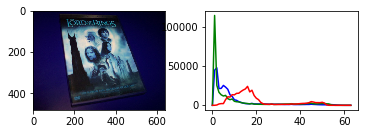

In [90]:
results = search(1561)
for res in results: 
    plot(res)